In [1]:
import pandas as pd
file_path = r"C:\Users\ADMIN\Downloads\soil_S.csv"
soil_data = pd.read_csv(file_path)
print(soil_data.head())

   index     A(410)     B(435)     C(460)    D(485)     E(510)     F(535)  \
0      1  3000.5425  1129.7125  3057.6375  807.2125  1058.1475  1692.7550   
1      2  2672.0175   841.8800  2680.7950  663.7975   871.0275  1687.5675   
2      3  3128.4525  1218.7700  3238.3050  824.2125  1051.1050  1866.6925   
3      4  3144.5700  1115.5300  3030.8125  800.4250  1068.3900   471.0225   
4      5  2198.3575   678.7750  2233.0225  532.2675   773.9400  1444.5350   

     G(560)     H(585)     R(610)    I(645)    S(680)   J(705)   T(730)  \
0  467.0775   474.2375  1436.3800  247.9975  349.3250  75.2000  88.6200   
1  409.4000   417.4025  1253.0350  224.1425  265.7800  67.5575  79.6800   
2  411.7975   420.6525  1300.8200  217.6150  366.7925  63.5300  87.1000   
3  473.0950  1411.9575   239.9825  321.0800   78.1200  90.1075  75.8225   
4  332.9225   330.5125  1300.9825  169.2450  304.4625  60.7750  81.0800   

      U(760)    V(810)    W(860)    K(900)  L(940)      S  
0    75.7500  244.5350  32

In [2]:
import pandas as pd
missing_values = soil_data.isnull().sum()

print(missing_values)

index     0
A(410)    1
B(435)    1
C(460)    1
D(485)    1
E(510)    1
F(535)    1
G(560)    1
H(585)    1
R(610)    1
I(645)    1
S(680)    1
J(705)    1
T(730)    1
U(760)    1
V(810)    1
W(860)    1
K(900)    1
L(940)    1
S         0
dtype: int64


In [3]:
import pandas as pd
file_path = r"C:\Users\ADMIN\Downloads\soil_S.csv"
soil_data = pd.read_csv(file_path)
print("Data Types before conversion:\n", soil_data.dtypes)
for column in soil_data.columns:
    soil_data[column] = pd.to_numeric(soil_data[column], errors='coerce')
print("Data Types after conversion:\n", soil_data.dtypes)
print("Missing values before filling:\n", soil_data.isnull().sum())
soil_data= soil_data.fillna(soil_data.mean())
print("Missing values after filling with mean:\n", soil_data.isnull().sum())
print("Data after filling missing values with mean:\n", soil_data.head())

Data Types before conversion:
 index       int64
A(410)    float64
B(435)    float64
C(460)    float64
D(485)    float64
E(510)    float64
F(535)    float64
G(560)    float64
H(585)    float64
R(610)    float64
I(645)    float64
S(680)    float64
J(705)    float64
T(730)    float64
U(760)    float64
V(810)    float64
W(860)    float64
K(900)    float64
L(940)    float64
S         float64
dtype: object
Data Types after conversion:
 index       int64
A(410)    float64
B(435)    float64
C(460)    float64
D(485)    float64
E(510)    float64
F(535)    float64
G(560)    float64
H(585)    float64
R(610)    float64
I(645)    float64
S(680)    float64
J(705)    float64
T(730)    float64
U(760)    float64
V(810)    float64
W(860)    float64
K(900)    float64
L(940)    float64
S         float64
dtype: object
Missing values before filling:
 index     0
A(410)    1
B(435)    1
C(460)    1
D(485)    1
E(510)    1
F(535)    1
G(560)    1
H(585)    1
R(610)    1
I(645)    1
S(680)    1
J(705)    1
T(7

In [4]:
y = soil_data['index'].values
x_columns = soil_data.columns.drop('index')
x = soil_data[x_columns].values

In [5]:
print("Shape of y:", y.shape)
print("Shape of x:", x.shape)

Shape of y: (95,)
Shape of x: (95, 19)


In [6]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
window_length = 11
polyorder = 2      
y_smooth = savgol_filter(y, window_length=window_length, polyorder=polyorder)

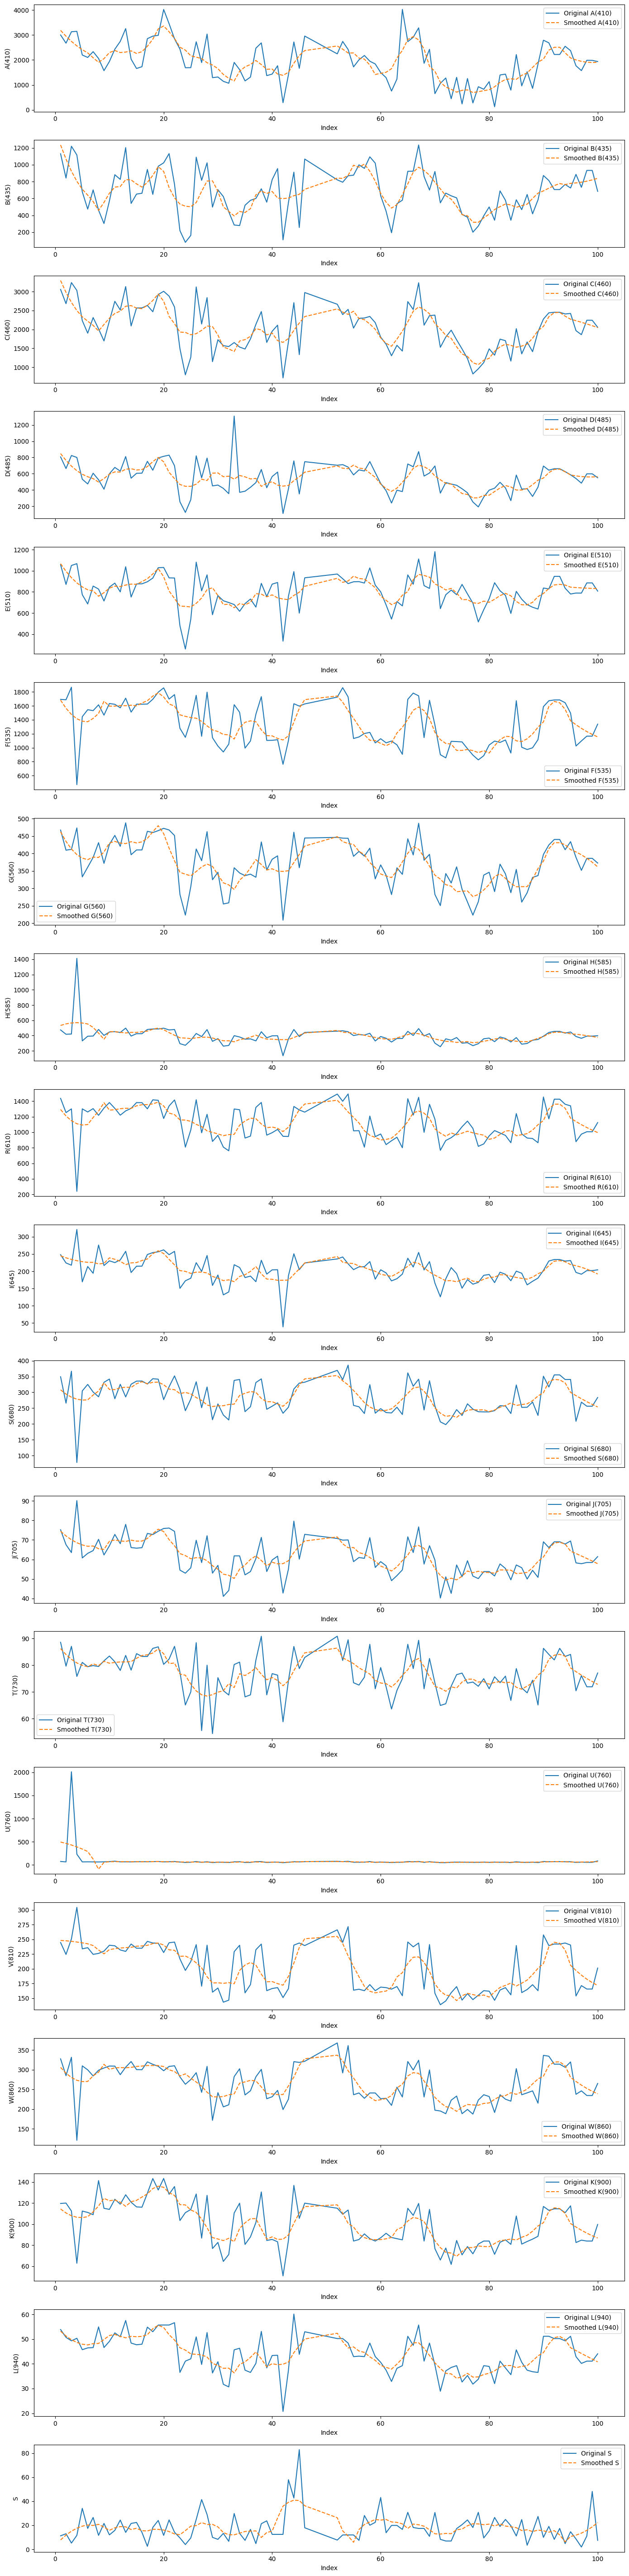

In [7]:
import numpy as np
x_smooth = np.apply_along_axis(lambda m: savgol_filter(m, window_length=window_length, polyorder=polyorder), axis=0, arr=x)
num_plots = len(x_columns)
fig, axes = plt.subplots(num_plots, 1, figsize=(14, 3 * num_plots))
#plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(x_columns):
    axes[i].plot(y, x[:, i], label=f'Original {col}')
    axes[i].plot(y, x_smooth[:, i], label=f'Smoothed {col}', linestyle='--')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
    axes[i].legend()
plt.tight_layout()
plt.show()
smoothed_data = pd.DataFrame(x_smooth, columns=[f'{col}_smooth' for col in x_columns])
smoothed_data['index'] = y
smoothed_data.to_csv('smoothed_data.csv', index=False)

In [8]:

print(smoothed_data.columns)

Index(['A(410)_smooth', 'B(435)_smooth', 'C(460)_smooth', 'D(485)_smooth',
       'E(510)_smooth', 'F(535)_smooth', 'G(560)_smooth', 'H(585)_smooth',
       'R(610)_smooth', 'I(645)_smooth', 'S(680)_smooth', 'J(705)_smooth',
       'T(730)_smooth', 'U(760)_smooth', 'V(810)_smooth', 'W(860)_smooth',
       'K(900)_smooth', 'L(940)_smooth', 'S_smooth', 'index'],
      dtype='object')


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
smoothed_data = pd.read_csv('smoothed_data.csv')

smoothed_data = smoothed_data.drop(columns=['index'])
X = smoothed_data.drop(columns=['S_smooth'])
y = smoothed_data['S_smooth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (76, 18)
Shape of X_test: (19, 18)
Shape of y_train: (76,)
Shape of y_test: (19,)


In [10]:
# LASSO HAS BEEN IMPLEMENTED AT THE END Due to its poor performance

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
train_score = ridge.score(X_train_scaled, y_train)
test_score = ridge.score(X_test_scaled, y_test)
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Ridge Train R^2 Score: {train_score:.2f}")
print(f"Ridge Test R^2 Score: {test_score:.2f}")
print(f"Ridge Train MSE: {train_mse:.2f}")
print(f"Ridge Test MSE: {test_mse:.2f}")

Ridge Train R^2 Score: 0.48
Ridge Test R^2 Score: 0.45
Ridge Train MSE: 18.14
Ridge Test MSE: 29.55


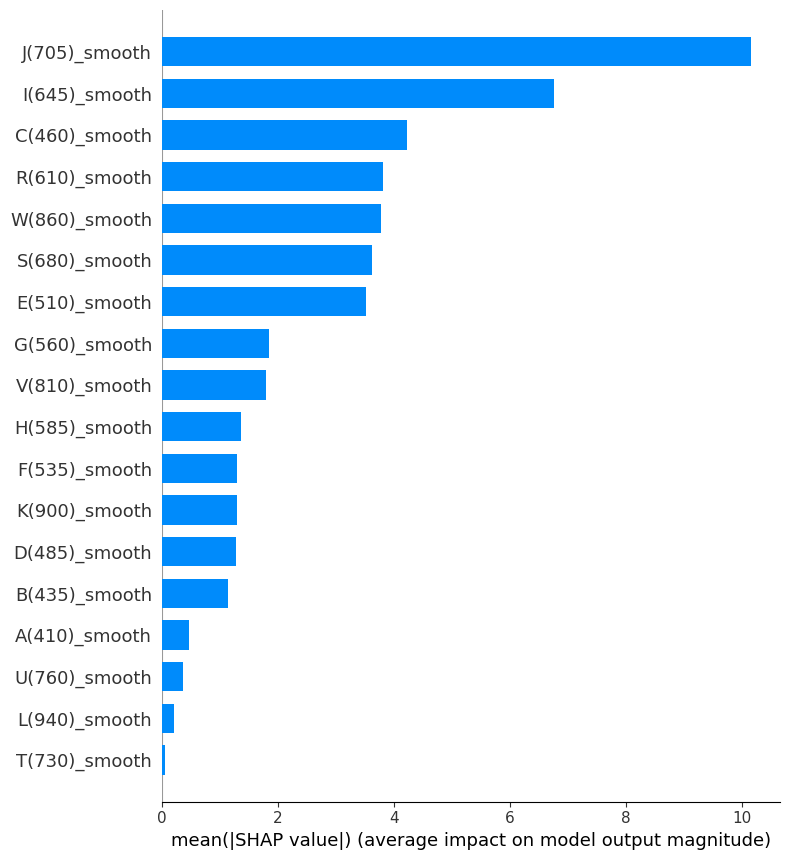

In [12]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import shap

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

def ridge_predict(X):
    return ridge.predict(X)

feature_names_list = X_train.columns.tolist()
explainer_ridge = shap.Explainer(ridge_predict, X_train_scaled)
shap_values_ridge = explainer_ridge.shap_values(X_train_scaled)
shap.summary_plot(shap_values_ridge, X_train_scaled, plot_type='bar', feature_names=feature_names_list)
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
bpnn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
bpnn.fit(X_train_scaled, y_train)
y_train_pred = bpnn.predict(X_train_scaled)
y_test_pred = bpnn.predict(X_test_scaled)
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"BPNN Train R^2 Score: {train_score:.2f}")
print(f"BPNN Test R^2 Score: {test_score:.2f}")
print(f"BPNN Train MSE: {train_mse:.2f}")
print(f"BPNN Test MSE: {test_mse:.2f}")

BPNN Train R^2 Score: 0.63
BPNN Test R^2 Score: 0.54
BPNN Train MSE: 13.08
BPNN Test MSE: 24.79


Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.


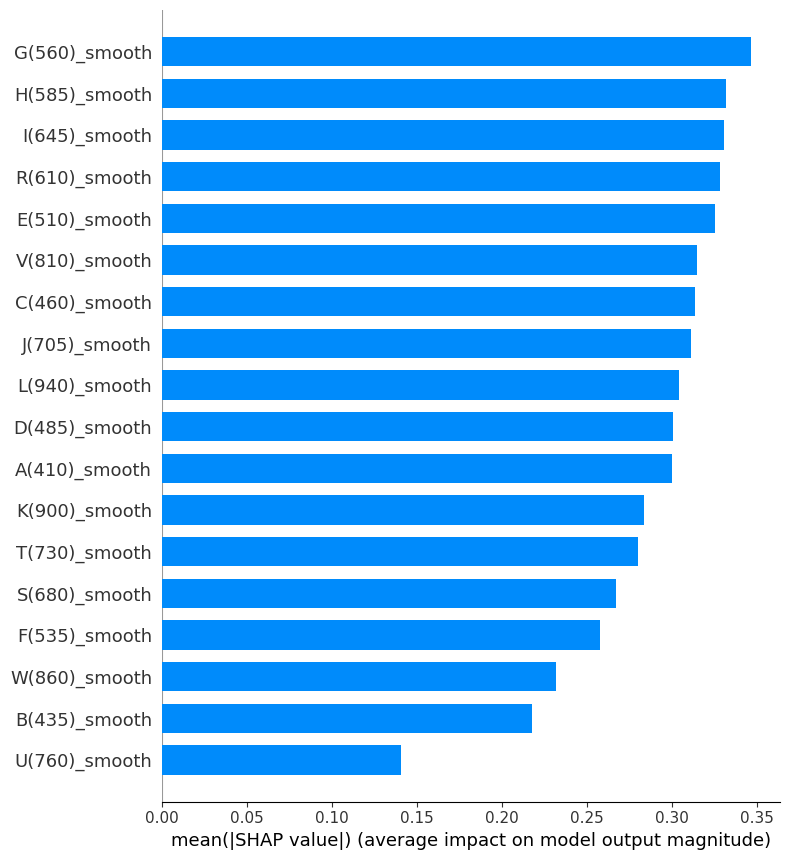

In [14]:
import shap
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

bpnn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=100, random_state=42)
bpnn.fit(X_train_scaled, y_train)
def model_predict(X):
    return bpnn.predict(X)
feature_names_list = X_train.columns.tolist()

explainer_bpnn = shap.Explainer(model_predict, X_train_scaled)

shap_values_bpnn = explainer_bpnn.shap_values(X_train_scaled)

shap.summary_plot(shap_values_bpnn, X_train_scaled, plot_type='bar', feature_names=feature_names_list)
plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
train_score = svm_rbf.score(X_train_scaled, y_train)
test_score = svm_rbf.score(X_test_scaled, y_test)
y_train_pred = svm_rbf.predict(X_train_scaled)
y_test_pred = svm_rbf.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"SVM RBF Train R^2 Score: {train_score:.2f}")
print(f"SVM RBF Test R^2 Score: {test_score:.2f}")
print(f"SVM RBF Train MSE: {train_mse:.2f}")
print(f"SVM RBF Test MSE: {test_mse:.2f}")

SVM RBF Train R^2 Score: 0.06
SVM RBF Test R^2 Score: -0.12
SVM RBF Train MSE: 32.70
SVM RBF Test MSE: 60.00


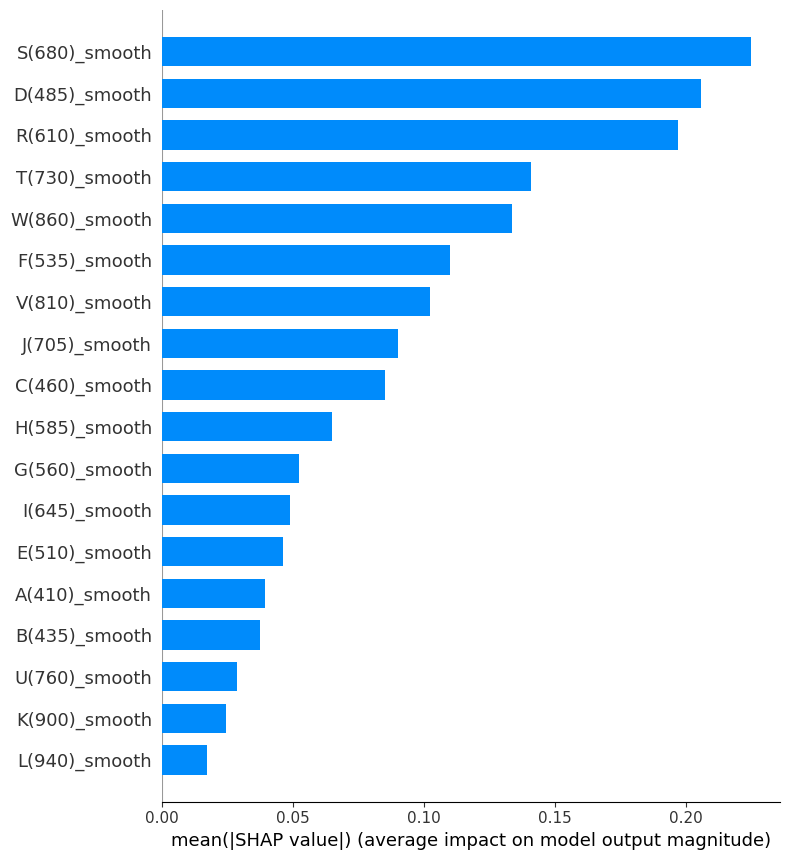

In [16]:
import shap
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

def model_predict(X):
    return svm_rbf.predict(X)

feature_names_list = X_train.columns.tolist()

explainer_svr = shap.Explainer(model_predict, X_train_scaled)

shap_values_svr = explainer_svr.shap_values(X_train_scaled)


shap.summary_plot(shap_values_svr, X_train_scaled, plot_type='bar', feature_names=feature_names_list)
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)

train_score = pls.score(X_train_scaled, y_train)
test_score = pls.score(X_test_scaled, y_test)

y_train_pred = pls.predict(X_train_scaled)
y_test_pred = pls.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"PLS Train R^2 Score: {train_score:.2f}")
print(f"PLS Test R^2 Score: {test_score:.2f}")
print(f"PLS Train MSE: {train_mse:.2f}")
print(f"PLS Test MSE: {test_mse:.2f}")

PLS Train R^2 Score: 0.07
PLS Test R^2 Score: 0.05
PLS Train MSE: 32.50
PLS Test MSE: 50.91


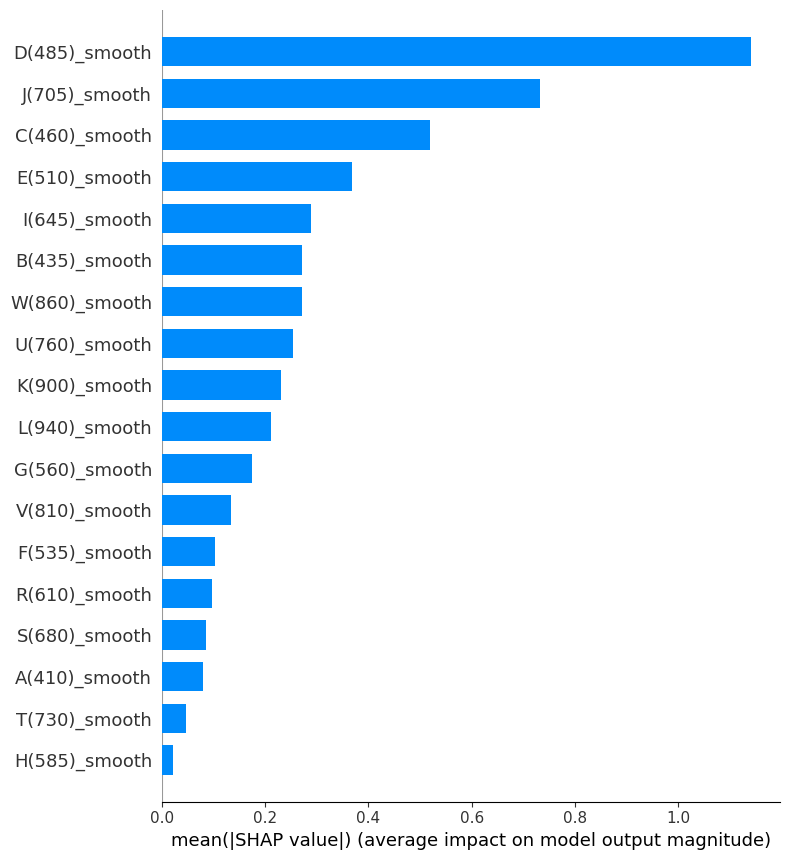

In [18]:
import shap
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)

def model_predict(X):
    return pls.predict(X)

feature_names_list = X_train.columns.tolist()

explainer_pls = shap.Explainer(pls.predict, X_train_scaled)

shap_values_pls = explainer_pls.shap_values(X_test_scaled)


shap.summary_plot(shap_values_pls, X_train_scaled, plot_type='bar', feature_names=feature_names_list)
plt.show()

In [19]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
pls_sigmoid = PLSRegression(n_components=12)

pipeline_sigmoid = make_pipeline(
    StandardScaler(),
    pls_sigmoid
)

pipeline_sigmoid.fit(X_train, y_train)

y_train_pred = pipeline_sigmoid.predict(X_train)
y_test_pred = pipeline_sigmoid.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"PLS Regression Train MSE: {train_mse:.2f}")
print(f"PLS Regression Test MSE: {test_mse:.2f}")
print(f"PLS Regression Train R2 Score: {train_r2:.2f}")
print(f"PLS Regression Test R2 Score: {test_r2:.2f}")

PLS Regression Train MSE: 13.10
PLS Regression Test MSE: 21.60
PLS Regression Train R2 Score: 0.63
PLS Regression Test R2 Score: 0.60


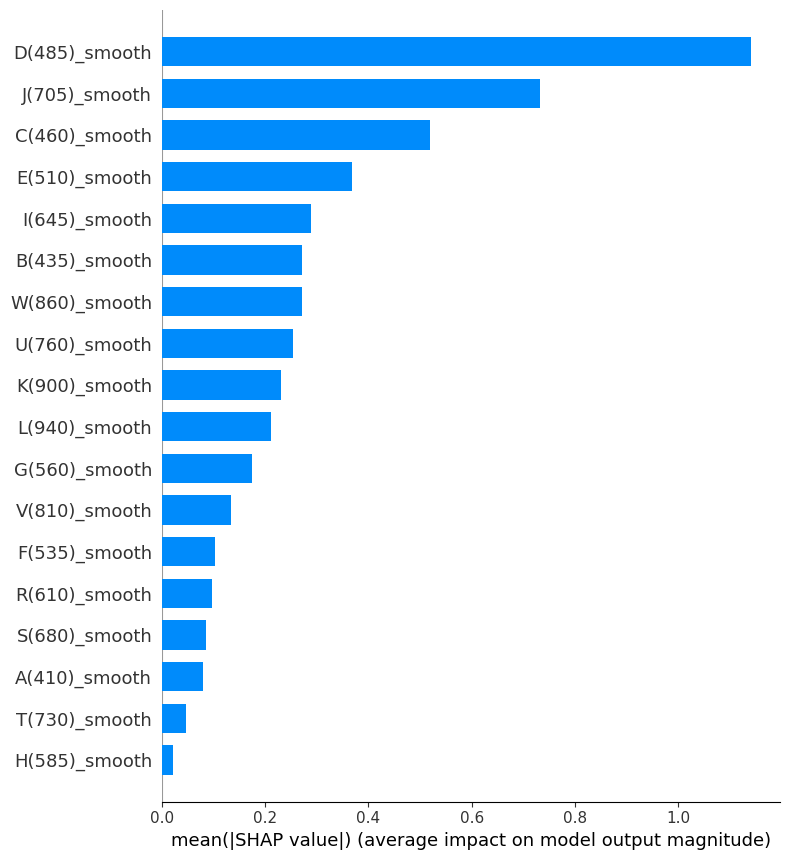

In [20]:
import shap
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt



pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)
def model_predict(X):
    return pls.predict(X)

feature_names_list = X_train.columns.tolist()

explainer_pls = shap.Explainer(model_predict, X_train_scaled)

shap_values_pls = explainer_pls.shap_values(X_test_scaled)

shap.summary_plot(shap_values_pls, X_train_scaled, plot_type='bar', feature_names=feature_names_list)
plt.show()

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso = Lasso(alpha=1.0) 
lasso.fit(X_train, y_train)

lasso.fit(X_train_scaled, y_train)

train_score = lasso.score(X_train_scaled, y_train)
test_score = lasso.score(X_test_scaled, y_test)
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R^2 Score: {train_score:.2f}")
print(f"Test R^2 Score: {test_score:.2f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")


Train R^2 Score: 0.02
Test R^2 Score: -0.07
Train MSE: 34.15
Test MSE: 57.71


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.388e+02, tolerance: 2.657e-01


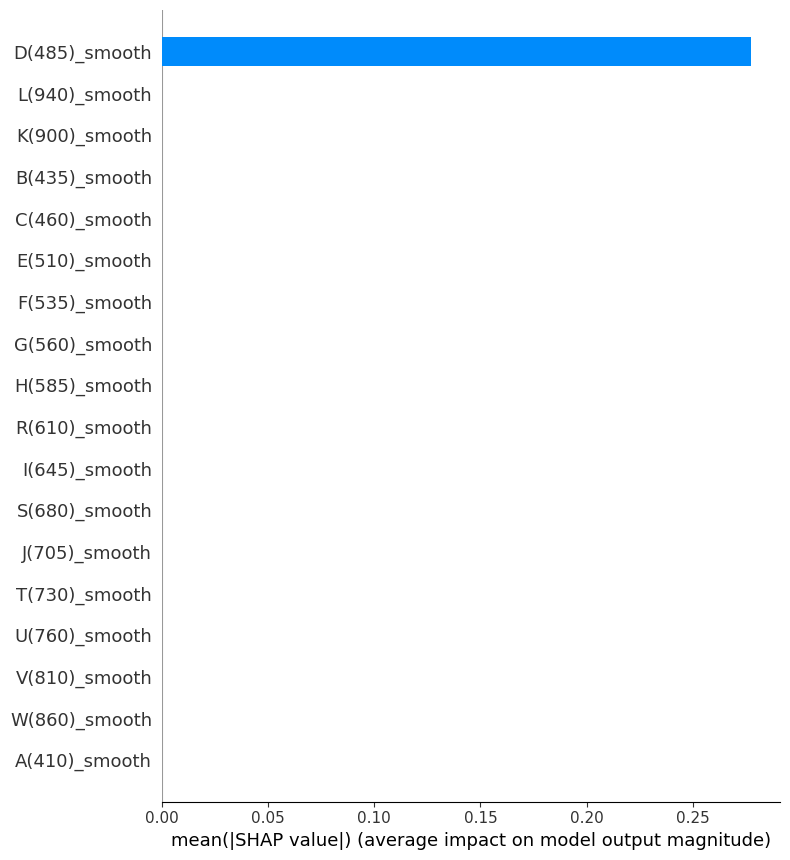

In [22]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import matplotlib

import shap
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (5, 5)
lasso = Lasso(alpha=1.0, max_iter=1000)
lasso.fit(X_train_scaled, y_train)

def lasso_predict(X):
    return lasso.predict(X)

feature_names_list = X_train.columns.tolist()

explainer_lasso = shap.Explainer(lasso_predict, X_train_scaled)
shap_values_lasso = explainer_lasso.shap_values(X_train_scaled)


shap.summary_plot(shap_values_lasso, X_train_scaled, plot_type='bar', feature_names=feature_names_list)
plt.show()